<a href="https://colab.research.google.com/github/Danika-Balas/msds-458/blob/master/458_Assignment1_Expt3_h1-85_h2-range60-72.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup and Preprocessing

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

from sklearn import metrics

import tensorflow as tf
from tensorflow import keras
keras.__version__

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'2.3.0-tf'

In [3]:
tf.__version__

'2.2.0-rc3'

In [4]:
from keras import metrics

Using TensorFlow backend.


In [0]:
# neccessary for K.gradient to work in TensorFlow 2.x
# only needed for the "Finding a pattern the hidden node maximally responds to" section below.
# but disabled to make Tensorboard work...
tf.compat.v1.disable_eager_execution() 

In [0]:
# Set see in order to achieve consistent results across runs
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

####Import MNIST dataset

In [7]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
train_images.shape, test_images.shape, test_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

In [9]:
#Store copy of training images in order to easily view images even after transformation are performed
example_train_images = train_images.copy()
example_train_images.shape

(60000, 28, 28)

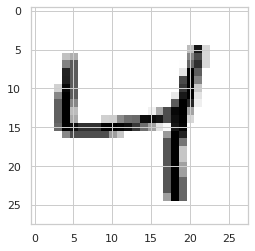

In [10]:
# Example of a single sample, a 28x28 pixel image of a handwritten digit
digit = example_train_images[2]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

####Prepare the data

In [0]:
# Reshape the data into the shape that the network expects
train_images = train_images.reshape((60000, 28 * 28))

# Scale the data to [0,1] interval
train_images = train_images.astype('float32') / 255

# Do the same for the test dataset
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
# Split training data into training set and validation set
val_images, train_images = train_images[:5000], train_images[5000:]
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

#Experiment 3

We will fine-tune the hyperparameters of the model until we find the 'best' model according to our selected metrics

In [0]:
# Function builds models with 1 hidden layer (by default), then the same number of nodes in each hidden layer
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model(n_hidden=1, n_neurons=2, learning_rate=0.001, input_shape=(28 * 28,)):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(keras.layers.Dense(85, activation="relu"))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dropout(0.25))
    model.add(layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,  metrics=['accuracy'])
    return model

In [0]:
# This function builds models with varying number of nodes in each hidden layer
def build_model2(n_neurons=(2,3), learning_rate=0.001, input_shape=(28 * 28,)):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    for layer in range(len(n_neurons)):
        model.add(keras.layers.Dense(n_neurons[layer], activation="relu"))
    model.add(layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,  metrics=['accuracy'])
    return model

In [0]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
keras_clf = KerasClassifier(build_model)

In [16]:
param_grid = {'n_neurons': range(60, 99)}
param_grid

{'n_neurons': range(60, 99)}

Use grid search to train models with different combinations of parameter values

In [0]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=keras_clf, param_grid=param_grid,cv=3,verbose = 2)
grid_cv.fit(train_images, train_labels, epochs=30,
                  validation_data=(val_images, val_labels),
                  callbacks=[keras.callbacks.EarlyStopping(patience=2)])

Fitting 3 folds for each of 39 candidates, totalling 117 fits
[CV] n_neurons=60 ....................................................
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 36666 samples, validate on 5000 samples
Epoch 1/30
36666/36666 [==============================] - 4s 113us/sample - loss: 0.4142 - accuracy: 0.8781 - val_loss: 0.1758 - val_accuracy: 0.9476
Epoch 2/30
36666/36666 [==============================] - 4s 114us/sample - loss: 0.1874 - accuracy: 0.9460 - val_loss: 0.1361 - val_accuracy: 0.9590
Epoch 3/30
36666/36666 [==============================] - 4s 111us/sample - loss: 0.1371 - accuracy: 0.9592 - val_loss: 0.1050 - val_accuracy: 0.9700
Epoch 4/30
36666/36666 [==============================] - 4s 112us/sample - loss: 0.1080 - accuracy: 0.9676 - val_loss: 0.1102 - val_accuracy: 0.9674
Epoch 5/30
36666/36666 [==============================] - 4s 107us/sample - loss: 0.0922 - accuracy: 0.9719 - val_loss: 0.0939 - val_accuracy: 0.9722
Epoch 6/30
36666/36666 [==============================] - 4s 109us/sample - loss: 0.0749 - accuracy: 0.9766 - val_loss: 0.0967 - val_accuracy: 0.9730
Epoch 7/30
36666/36666 [===========================

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.8s remaining:    0.0s


Train on 36667 samples, validate on 5000 samples
Epoch 1/30
36667/36667 [==============================] - 4s 109us/sample - loss: 0.3907 - accuracy: 0.8846 - val_loss: 0.1790 - val_accuracy: 0.9472
Epoch 2/30
36667/36667 [==============================] - 4s 109us/sample - loss: 0.1767 - accuracy: 0.9480 - val_loss: 0.1172 - val_accuracy: 0.9662
Epoch 3/30
36667/36667 [==============================] - 4s 121us/sample - loss: 0.1274 - accuracy: 0.9625 - val_loss: 0.1121 - val_accuracy: 0.9662
Epoch 4/30
36667/36667 [==============================] - 4s 108us/sample - loss: 0.0991 - accuracy: 0.9694 - val_loss: 0.1005 - val_accuracy: 0.9696
Epoch 5/30
36667/36667 [==============================] - 4s 109us/sample - loss: 0.0836 - accuracy: 0.9742 - val_loss: 0.0998 - val_accuracy: 0.9690
Epoch 6/30
36667/36667 [==============================] - 4s 109us/sample - loss: 0.0726 - accuracy: 0.9770 - val_loss: 0.0937 - val_accuracy: 0.9740
Epoch 7/30
36667/36667 [===========================

##EVALUATE

### Inspecting the best estimator

Let's get the number of neurons that produced the best estimator

In [0]:
grid_cv.best_params_

Let's get the rsults to compare the performance of the 100 models.

In [0]:
results = grid_cv.cv_results_
results

In [0]:
results['params'], results['rank_test_score']

In [0]:
best_model = grid_cv.best_estimator_.model
keras.utils.plot_model(best_model, show_shapes=True)

In [0]:
best_model.evaluate(test_images, test_labels)